# Raveling distress detection using logistic regression
It is a image classification problem using shallow supervised machine learning
algorithms of logistic regression (LR). The dataset consists of images obtained from pavements. The images can contain either raveling distress or no raveling distress.The objective is to develop a binary image classification model that can classify a given image if it contains raveling distress or not.

The dataset consists of 2 folders: 'train' and 'test'. The folder 'train' is a labelled dataset and consists of
2 sub-folders: 'Raveling' and 'Non_raveling'. The sub-folder 'Raveling' consists of a total of 350
images containing raveling distress, while the 'Non_raveling' sub-folder contains 350 images with no
raveling distress. All images are of the ‘.jpg’ format.
The ‘test’ folder consists of the test dataset images. There are a total of 700 images in this folder (all
‘.jpg’ files). These images are unlabelled i.e., the labels are not provided, whether they contain
raveling distress or not. The objective of this challenge is to predict the class of each of these test
images. The class can be either ‘Raveling’ or ‘Non_raveling’. The filenames of these test images are
given as 1.jpg, 2.jpg, 3.jpg, …, 300.jpg.

The link for the dataset is:https://www.kaggle.com/competitions/raveling-detection-ce784a-2023/data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

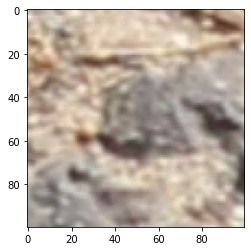

In [2]:
#reading one image file
img1=mpimg.imread('raveling-detection-ce784a-2023/mod_ravelling_dataset/train/Raveling/image8.jpg')
plt.imshow(img1)

In [3]:
#creating list for raveling and nonraveling data with image names
import os
raveling_data=os.listdir('raveling-detection-ce784a-2023/mod_ravelling_dataset/train/Raveling')
nonraveling_data=os.listdir('raveling-detection-ce784a-2023/mod_ravelling_dataset/train/Non_raveling')
raveling_data

['image100.jpg',
 'image101.jpg',
 'image104.jpg',
 'image105.jpg',
 'image11.jpg',
 'image115.jpg',
 'image116.jpg',
 'image117.jpg',
 'image120.jpg',
 'image121.jpg',
 'image123.jpg',
 'image130.jpg',
 'image132.jpg',
 'image134.jpg',
 'image136.jpg',
 'image137.jpg',
 'image14.jpg',
 'image140.jpg',
 'image145.jpg',
 'image15.jpg',
 'image150.jpg',
 'image152.jpg',
 'image157.jpg',
 'image16.jpg',
 'image161.jpg',
 'image167.jpg',
 'image169.jpg',
 'image17.jpg',
 'image176.jpg',
 'image18.jpg',
 'image182.jpg',
 'image183.jpg',
 'image185.jpg',
 'image186.jpg',
 'image188.jpg',
 'image19.jpg',
 'image192.jpg',
 'image193.jpg',
 'image195.jpg',
 'image2.jpg',
 'image202.jpg',
 'image203.jpg',
 'image204.jpg',
 'image21.jpg',
 'image211.jpg',
 'image212.jpg',
 'image213.jpg',
 'image22.jpg',
 'image222.jpg',
 'image225.jpg',
 'image228.jpg',
 'image229.jpg',
 'image23.jpg',
 'image231.jpg',
 'image232.jpg',
 'image234.jpg',
 'image235.jpg',
 'image236.jpg',
 'image237.jpg',
 'image23

In [4]:
#adding images to respective ravel and nonravel arrays
ravel_img=[]
for i in raveling_data:
    img=mpimg.imread("raveling-detection-ce784a-2023/mod_ravelling_dataset/train/Raveling/"+i)
    ravel_img.append(img)
nonravel_img=[]
for i in nonraveling_data:
    img=mpimg.imread("raveling-detection-ce784a-2023/mod_ravelling_dataset/train/Non_raveling/"+i)
    nonravel_img.append(img)

In [5]:
ravel_img=np.array(ravel_img)
nonravel_img=np.array(nonravel_img)
print(ravel_img,nonravel_img)

[[[[ 35  34  39]
   [ 38  37  42]
   [ 50  49  54]
   ...
   [126 125 121]
   [137 136 132]
   [142 141 137]]

  [[ 38  37  42]
   [ 39  38  43]
   [ 47  46  51]
   ...
   [130 129 125]
   [137 136 132]
   [142 141 137]]

  [[ 40  39  44]
   [ 41  40  45]
   [ 45  44  49]
   ...
   [130 129 125]
   [133 132 128]
   [137 136 132]]

  ...

  [[ 83  84  89]
   [ 77  78  83]
   [ 91  92  97]
   ...
   [142 135 127]
   [141 134 126]
   [140 136 127]]

  [[ 92  93  97]
   [ 86  87  91]
   [ 93  94  98]
   ...
   [144 139 133]
   [144 139 133]
   [145 140 134]]

  [[ 98  99 103]
   [ 95  96 100]
   [ 97  98 102]
   ...
   [152 147 141]
   [153 148 144]
   [156 151 147]]]


 [[[154 157 164]
   [155 158 165]
   [163 166 173]
   ...
   [165 167 179]
   [166 168 180]
   [186 188 200]]

  [[138 141 148]
   [137 140 147]
   [137 140 147]
   ...
   [164 166 178]
   [163 165 177]
   [175 177 189]]

  [[137 140 147]
   [135 138 145]
   [122 125 132]
   ...
   [160 162 174]
   [156 158 170]
   [155 157

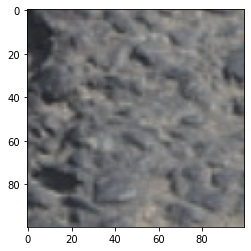

In [6]:
# seeing how the input dataset images are
plt.imshow(ravel_img[0])

In [7]:
#concatenate the image files
data=np.concatenate([ravel_img,nonravel_img])
type(data)

numpy.ndarray

In [8]:
#creating standard deviation of pixel values
stdev=[]
for i in data:
    stdev.append(np.std(i,axis=(0,1,2)))

In [9]:
# creating list of mean of pixel values
mpixel=[]
for i in data:
    mpixel.append(np.mean(i,axis=(0,1,2)))

In [10]:
from scipy.stats import skew,kurtosis

In [11]:
#creating list of skewness
skewpix=[]
for i in data:
    sk=skew(i).mean()
    skewpix.append(sk)

In [12]:
#creating list of kurtosis of pixel values
kurtpix=[]
for i in data:
    kurtpix.append(kurtosis(i).mean())

In [13]:
#creating list of range of pixel values
coef_rangepix=[]
for i in data:
    maxpix=np.max(i,axis=(0,1,2))
    minpix=np.min(i,axis=(0,1,2))
    coef_rangepix.append(maxpix-minpix)

In [14]:
#creating a dataframe for all features
df=pd.DataFrame(data=[stdev,mpixel,skewpix,kurtpix,coef_rangepix])
df=df.T
df.columns=['std','mean','skew','kurtosis','coef_range']
df

,std,mean,skew,kurtosis,coef_range
0,24.913340,111.419933,-0.411842,0.010793,147.0
1,27.522592,165.665033,0.378505,0.616457,183.0
2,33.306756,130.007300,0.200624,-0.602697,199.0
3,38.938207,97.030833,0.341629,-0.063609,245.0
4,36.427287,101.005167,0.404422,-0.445448,212.0
...,...,...,...,...,...
695,27.671717,110.509500,0.641329,-0.701798,139.0
696,26.959894,111.035767,0.646594,0.360905,194.0
697,13.672827,100.619167,0.351084,0.637632,114.0
698,22.951897,125.583733,0.348575,-0.008588,152.0


In [15]:
#adding the output column to the data 1=raveling,0=nonraveling
outrav=np.ones(350)
outnrav=np.zeros(350)
out=np.concatenate([outrav,outnrav])
out=pd.DataFrame(out,columns=['out'])
df=pd.concat([df,out],axis=1)
df


,std,mean,skew,kurtosis,coef_range,out
0,24.913340,111.419933,-0.411842,0.010793,147.0,1.0
1,27.522592,165.665033,0.378505,0.616457,183.0,1.0
2,33.306756,130.007300,0.200624,-0.602697,199.0,1.0
3,38.938207,97.030833,0.341629,-0.063609,245.0,1.0
4,36.427287,101.005167,0.404422,-0.445448,212.0,1.0
...,...,...,...,...,...,...
695,27.671717,110.509500,0.641329,-0.701798,139.0,0.0
696,26.959894,111.035767,0.646594,0.360905,194.0,0.0
697,13.672827,100.619167,0.351084,0.637632,114.0,0.0
698,22.951897,125.583733,0.348575,-0.008588,152.0,0.0


In [16]:
# Train test split 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df[['std','mean','skew','kurtosis','coef_range']],df['out'], test_size=0.2, random_state=86)

In [17]:
# model training
from sklearn.linear_model import LogisticRegression
my_model=LogisticRegression()
my_model.fit(X_train,Y_train)

LogisticRegression()

In [18]:
#trying out the model
prediction=my_model.predict(X_test)
prediction

array([0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0.,
       0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1.,
       0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0.,
       0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1.,
       1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1.,
       1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 0.])

In [19]:
#accuracy testing
from sklearn.metrics import classification_report
print(classification_report(Y_test,prediction))

              precision    recall  f1-score   support

         0.0       0.75      0.66      0.70        62
         1.0       0.75      0.82      0.79        78

    accuracy                           0.75       140
   macro avg       0.75      0.74      0.74       140
weighted avg       0.75      0.75      0.75       140



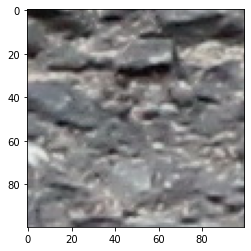

In [20]:
#creating list for test data and storing images
test=os.listdir("raveling-detection-ce784a-2023/mod_ravelling_dataset/test")
test=np.array(test)
test_data=[]
for i in test:
    test_data.append(mpimg.imread('raveling-detection-ce784a-2023/mod_ravelling_dataset/test/'+i))
plt.imshow(test_data[1])

In [21]:
test_data=np.array(test_data)

In [22]:
#creating standard deviation of pixel values of test images
stdev_test=[]
for i in test_data:
    stdev_test.append(np.std(i,axis=(0,1,2))) 

In [23]:
# creating list of mean of pixel values of test images
mpixel_test=[]
for i in test_data:
    mpixel_test.append(np.mean(i,axis=(0,1,2)))

In [24]:
#creating list of skewness of pixel values of test images
skewpix_test=[]
for i in test_data:
    sk=skew(i).mean()
    skewpix_test.append(sk)

In [25]:
#creating list of kurtosis of pixel values
kurtpix_test=[]
for i in test_data:
    kurtpix_test.append(kurtosis(i).mean())

In [26]:
#creating list of range of pixel values for test images
coef_rangepix_test=[]
for i in test_data:
    maxpix_test=np.max(i,axis=(0,1,2))
    minpix_test=np.min(i,axis=(0,1,2))
    coef_rangepix_test.append((maxpix_test-minpix_test))

In [27]:
#creating a dataframe for all features of the the test
df_test=pd.DataFrame(data=[stdev_test,mpixel_test,skewpix_test,kurtpix_test,coef_rangepix_test])
df_test=df_test.T
df_test.columns=['std','mean','skew','kurtosis','coef_range']
df_test

,std,mean,skew,kurtosis,coef_range
0,29.084056,117.774233,0.610163,0.080520,174.0
1,38.228421,123.148967,-0.384864,0.144272,239.0
2,20.620159,165.133533,-0.792044,0.723292,124.0
3,31.910661,127.832533,0.151156,-0.341362,185.0
4,43.523072,128.616167,0.263630,-0.402971,251.0
...,...,...,...,...,...
295,19.252292,133.119133,0.296133,0.189578,148.0
296,28.676888,125.671433,-0.548414,0.260691,191.0
297,28.018798,121.817600,0.210116,-0.668710,168.0
298,31.887970,152.408300,-0.492777,-0.221794,190.0


In [28]:
#predicting for test data
prediction_test=my_model.predict(df_test)
prediction_test

array([0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
       0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1.,
       1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0.,
       1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1.,
       0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       1., 1., 1., 0., 0.

In [29]:
#CSV file creation
prediction_test=pd.DataFrame(prediction_test)
test_data_1=pd.DataFrame(test)
prediction_test_a=pd.concat([test_data_1,prediction_test],axis=1)
prediction_test_a

,0,0
0,1.jpg,0.0
1,10.jpg,1.0
2,100.jpg,0.0
3,101.jpg,1.0
4,102.jpg,1.0
...,...,...
295,95.jpg,0.0
296,96.jpg,1.0
297,97.jpg,1.0
298,98.jpg,1.0


In [30]:
prediction_test_a.columns=['filename','class']
prediction_test_a=prediction_test_a.set_index('filename')
prediction_test_a

,class
filename,
1.jpg,0.0
10.jpg,1.0
100.jpg,0.0
101.jpg,1.0
102.jpg,1.0
...,...
95.jpg,0.0
96.jpg,1.0
97.jpg,1.0


In [31]:
prediction_test_a['class']=np.where(prediction_test_a['class']==1,'Raveling','Nonraveling')
prediction_test_a

,class
filename,
1.jpg,Nonraveling
10.jpg,Raveling
100.jpg,Nonraveling
101.jpg,Raveling
102.jpg,Raveling
...,...
95.jpg,Nonraveling
96.jpg,Raveling
97.jpg,Raveling


In [32]:
csv_test=prediction_test_a.to_csv('prediction_test_a.csv',index=True)